# Group Assignment #3 - Cleaning Midterm Assignment with Functions/Loops

#### Team member: Veronica De Santos Quezada

### Who’s Most at Risk? Social Demographics and Traffic Collisions in the City of Los Angeles

Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in the City of Los Angeles. This notebook will explore age in the City of LA.

#### Data Sources & Geographic Information
- **American Community Survey (ACS) 2015-2029 (5-Year Estimates) on Age**

## Analyze my dataset

In [322]:
# importing pandas for data exploration and data analysis
import pandas as pd

In [323]:
# upload acs data 
df = pd.read_csv('data_midterm/age_dataset.csv')

In [324]:
# view rows and columns coumt 
df.shape

(2346, 25)

## Converting Data Types

In [325]:
# review Geo_FIPS for leading zero
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [326]:
# convert Geo_FIPS, state, and county data type from integer to string to include leading zero 
df = pd.read_csv('data_midterm/age_dataset.csv',
     dtype=
                 {'Geo_FIPS': str, 
                  'Geo_STATE': str, 
                  'Geo_COUNTY': str })

In [327]:
# check for leading zero 
df.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,06,...,200,132,291,652,555,580,604,430,219,78
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,06,...,234,12,289,535,211,568,693,417,219,44
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,06,...,383,198,651,848,1030,933,781,392,181,51
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,06,...,309,142,305,503,513,445,589,306,227,63
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,06,...,93,43,182,460,363,620,880,442,272,226


In [328]:
# checking state and county
print(df.Geo_STATE.head(2))     
print(df.Geo_COUNTY.head(2))

0    06
1    06
Name: Geo_STATE, dtype: object
0    037
1    037
Name: Geo_COUNTY, dtype: object


In [329]:
# renaming my dataset as age for clarity
age = df

## Cleaning and Reorganizing the data

In [330]:
# find unnecessary columns with zero values 
age.columns[age.isna().all()].tolist()

[]

In [331]:
# seems like the age dataset has no zero values, but I will still delete uncessary columns 
age = age.dropna(axis=1,how="all")

In [332]:
# Create a new dataframe with selected columns
columns_to_keep = [
    'Geo_FIPS',
    'Geo_STATE',
    'Geo_COUNTY',
    'Geo_TRACT',
    'SE_A01001_001',
    'SE_A01001_002',
    'SE_A01001_003',
    'SE_A01001_004',
    'SE_A01001_005',
    'SE_A01001_006',
    'SE_A01001_007',
    'SE_A01001_008',
    'SE_A01001_009',
    'SE_A01001_010',
    'SE_A01001_011',
    'SE_A01001_012',
    'SE_A01001_013'
]

# Select only the specified columns
age = age[columns_to_keep]

In [333]:
# changing ACS column names to category names
column_rename_map = {
    'SE_A01001_001': 'Total Population',
    'SE_A01001_002': 'Under 5 Years',
    'SE_A01001_003': '5 to 9 Years',
    'SE_A01001_004': '10 to 14 Years',
    'SE_A01001_005': '15 to 17 Years',
    'SE_A01001_006': '18 to 24 Years',
    'SE_A01001_007': '25 to 34 Years',
    'SE_A01001_008': '35 to 44 Years',
    'SE_A01001_009': '45 to 54 Years',
    'SE_A01001_010': '55 to 64 Years',
    'SE_A01001_011': '65 to 74 Years',
    'SE_A01001_012': '75 to 84 Years',
    'SE_A01001_013': '85 Years and Over'
}

In [334]:
# Rename the columns in age
age = age.rename(columns=column_rename_map)

In [335]:
# Define new age groupings
age['Children & Adolescents (0-17)'] = age[['Under 5 Years', '5 to 9 Years', '10 to 14 Years', '15 to 17 Years']].sum(axis=1)
age['Young Adults (18-34)'] = age[['18 to 24 Years', '25 to 34 Years']].sum(axis=1)
age['Middle-Aged Adults (35-64)'] = age[['35 to 44 Years', '45 to 54 Years', '55 to 64 Years']].sum(axis=1)
age['Older Adults (65 and Over)'] = age[['65 to 74 Years', '75 to 84 Years', '85 Years and Over']].sum(axis=1)

# Select only relevant columns (keep geographic identifiers and new age groups)
age_grouped_combined = age[['Geo_FIPS', 'Geo_STATE', 'Geo_COUNTY', 'Geo_TRACT', 'Total Population',
                                 'Children & Adolescents (0-17)', 'Young Adults (18-34)',
                                 'Middle-Aged Adults (35-64)', 'Older Adults (65 and Over)']]

In [336]:
# renaming my dataset
age_final = age_grouped_combined

## Merge

###  Merging the City of LA census tracts with LA County census data for our project area

In [337]:
# Importing library
import pandas as pd

In [338]:
# I will use geographical data, importing geopandas
import geopandas as gpd

In [339]:
# Upload my data
cityofla=gpd.read_file('data_midterm/cityLA.zip')

In [340]:
# add a FIPS column
# creating a new column so that I can merge the shapefile and census tracts 

cityofla['Geo_FIPS'] = '06' + '037' + cityofla['TRACTCE']

In [341]:
# checking new column was made 
cityofla.head(2)

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry,Geo_FIPS
0,G0600370101110,06,037,101110,06037101110,1011.10,Census Tract 1011.10,G5020,S,1142401.0,0.0,+34.2594737,-118.2929869,4585.520052,4585.520052,1.142400e+06,"POLYGON ((-2019033.589 -124429.155, -2018948.5...",06037101110
1,G0600370101122,06,037,101122,06037101122,1011.22,Census Tract 1011.22,G5020,S,2644045.0,0.0,+34.2677213,-118.2901465,9652.233049,9652.233049,2.644046e+06,"POLYGON ((-2017297.948 -125225.326, -2017305.0...",06037101122


In [342]:
# need to merge by creating a new dataframe
la_age =cityofla.merge(age_final,on="Geo_FIPS")

## Function and Loop for Age Distribution in the City of Los Angeles

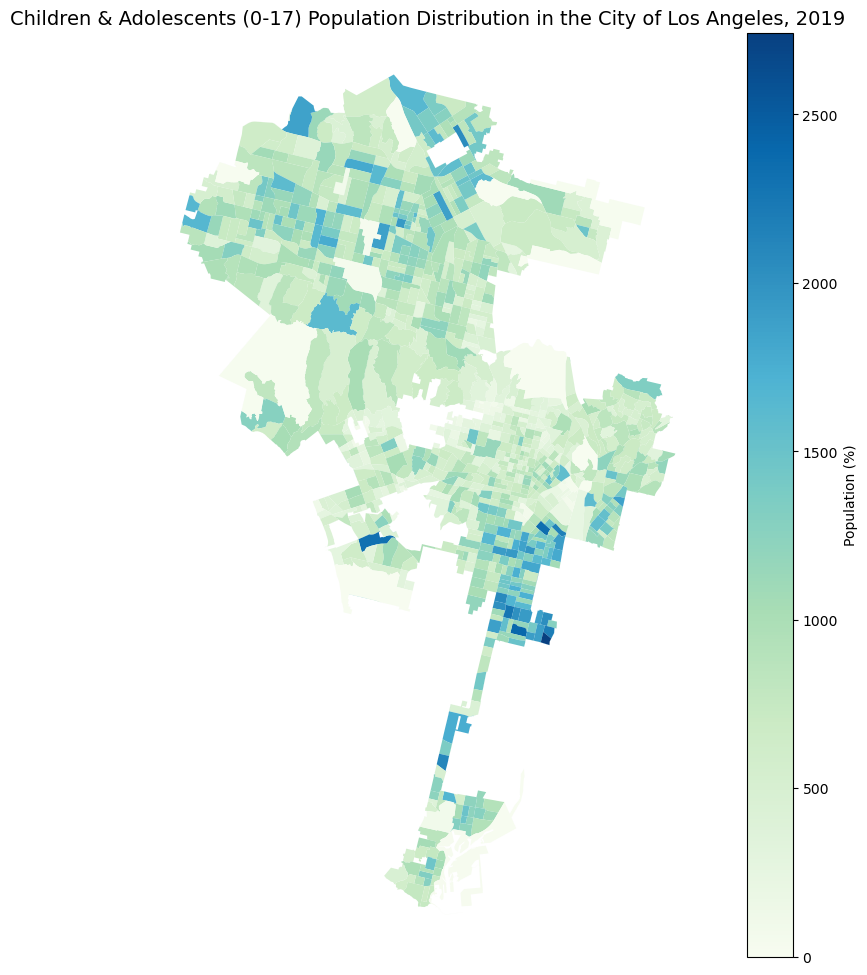

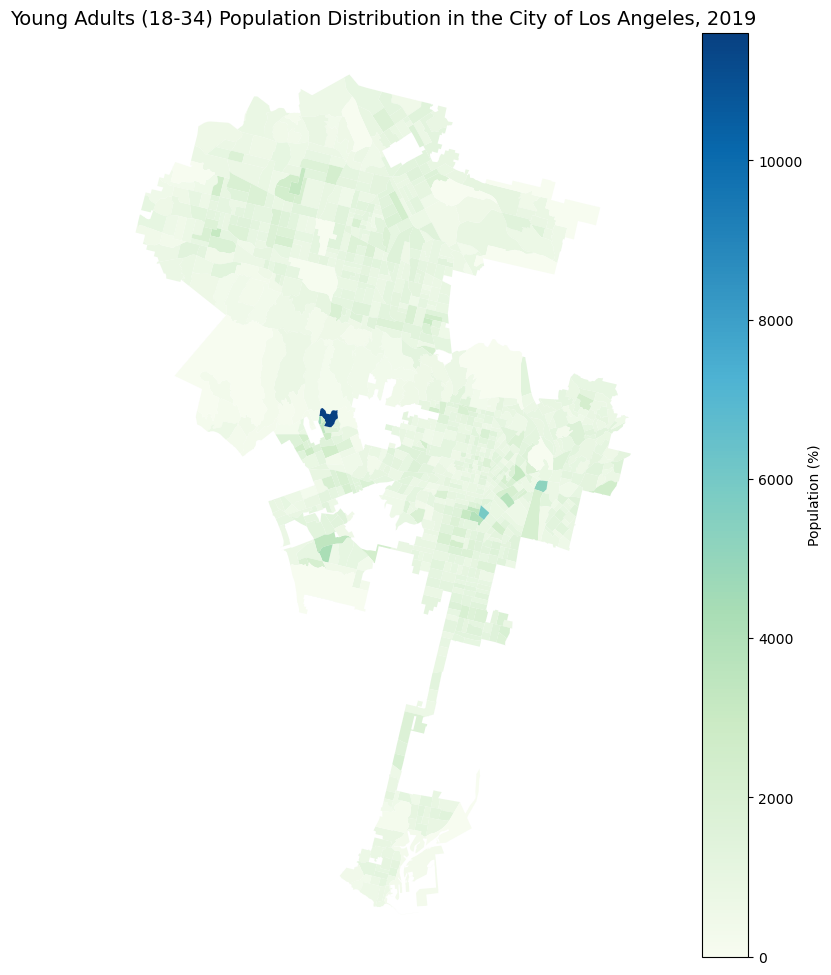

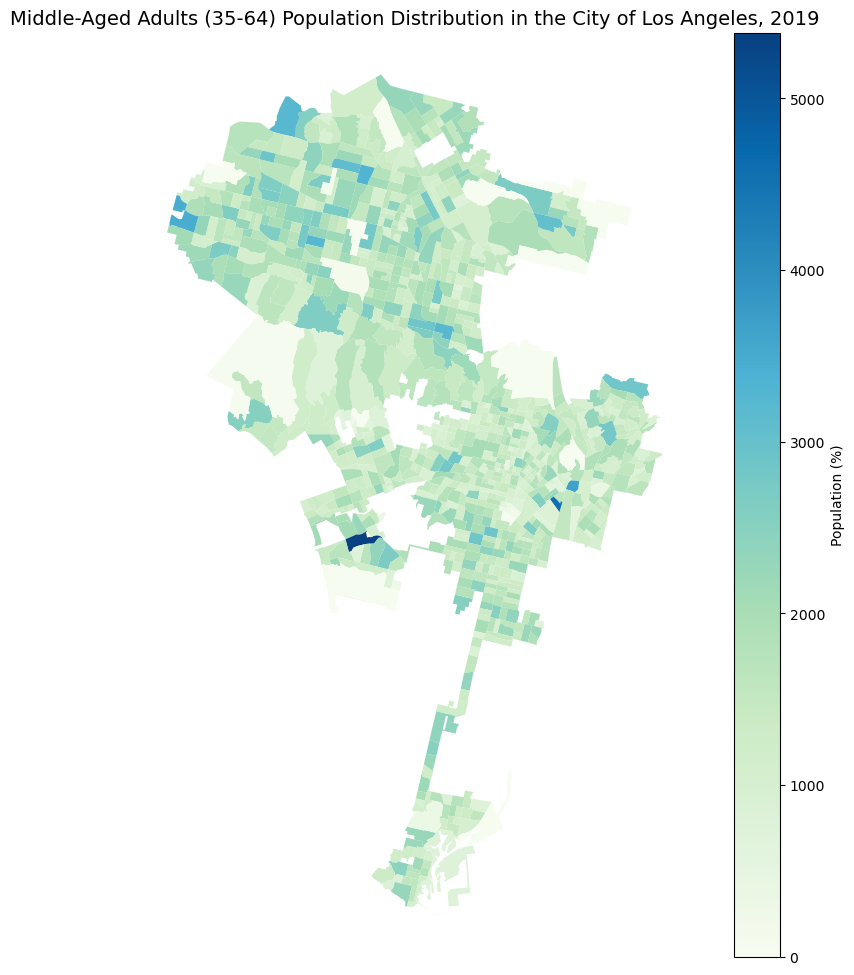

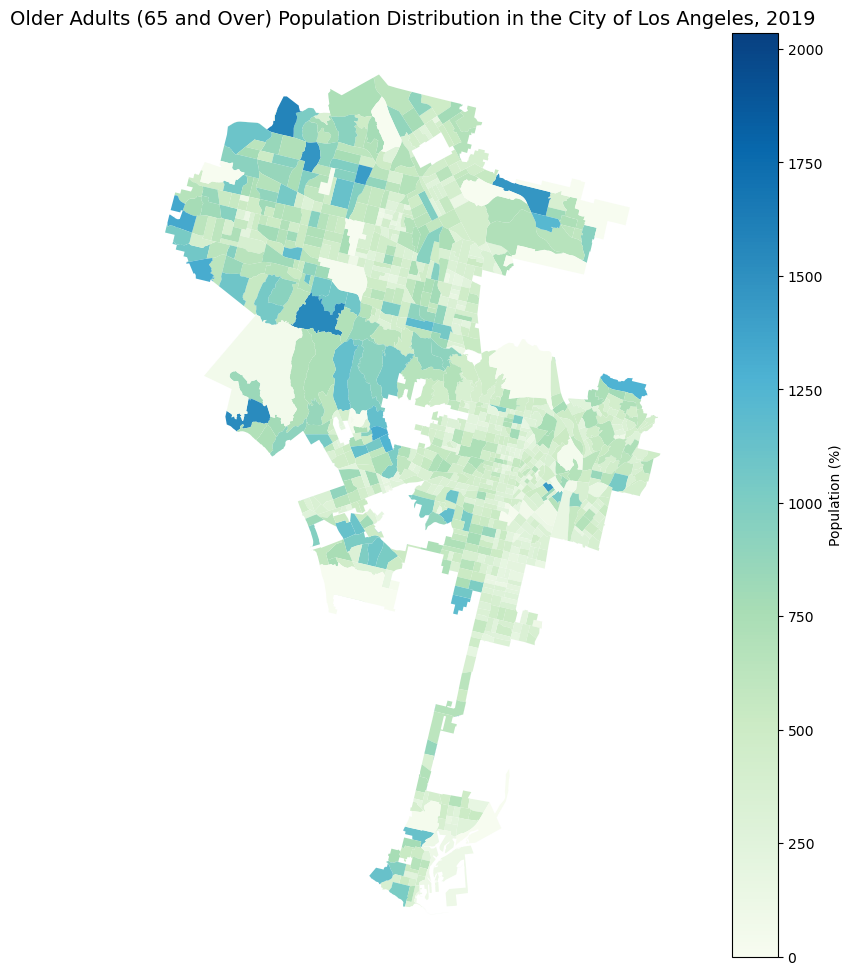

In [343]:
import matplotlib.pyplot as plt

# Function to generate age distribution maps
def plot_age_maps(data, columns, title_prefix):  
    
    for column in columns:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        
        # Plot census tracts with the selected age group percentage
        la_age.plot(ax=ax, column=column, legend=True, cmap='GnBu',
                    legend_kwds={"label": "Population (%)", "orientation": "vertical"})
        
        ax.axis('off')
        ax.set_title(f"{column} {title_prefix} in the City of Los Angeles, 2019", fontsize=14)

# Use the age categories
age_map = [
    'Children & Adolescents (0-17)',
    'Young Adults (18-34)',
    'Middle-Aged Adults (35-64)',
    'Older Adults (65 and Over)'
]

# Loop!
plot_age_maps(la_age, age_map, "Population Distribution")


## Charts for Age Distribution in the City of Los Angeles

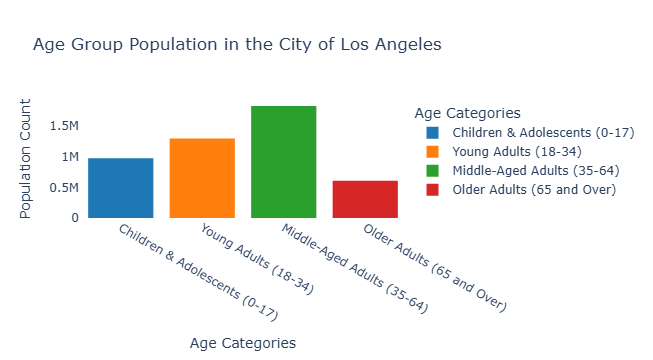

In [344]:
# Create a DataFrame for the age group data
age_bar = pd.DataFrame({
    'Age Group': ['Children & Adolescents (0-17)', 'Young Adults (18-34)', 
                  'Middle-Aged Adults (35-64)', 'Older Adults (65 and Over)'],
    'Population': [978971, 1301147, 1833051, 607531]
})

# Plot the bar chart
import plotly.express as px
fig = px.bar(age_bar, 
             x='Age Group', 
             y='Population', 
             title='Age Group Population in the City of Los Angeles',
             labels={'Population': 'Population Count', 'Age Group': 'Age Categories'},
             color='Age Group',
             color_discrete_map={
                 'Children & Adolescents (0-17)': '#1f77b4',  # Blue
                 'Young Adults (18-34)': '#ff7f0e',  # Orange
                 'Middle-Aged Adults (35-64)': '#2ca02c',  # Green
                 'Older Adults (65 and Over)': '#d62728'  # Red
             }) 

# Set the background to transparent
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent outer background
)

fig.update_traces(marker_line_width=0, textposition='outside')

fig.show()

## Examining SCAG High Injury Network

In [345]:
# Upload HIN geojson dataset
HIN =gpd.read_file('data_midterm/High_Injury_Network_SCAG.geojson')

In [346]:
# Keep city of LA
HINla = HIN[HIN.CITY == 'Los Angeles']

In [347]:
# Check and Convert CRS
la_age = la_age.to_crs('EPSG:4326')
print("Original CRS:", la_age.crs)

Original CRS: EPSG:4326


In [348]:
# Conduct a Spatial Join
la_age_HIN = gpd.sjoin(la_age, HINla)

## Function and Loop for HIN over Age Distribution in the City of Los Angeles

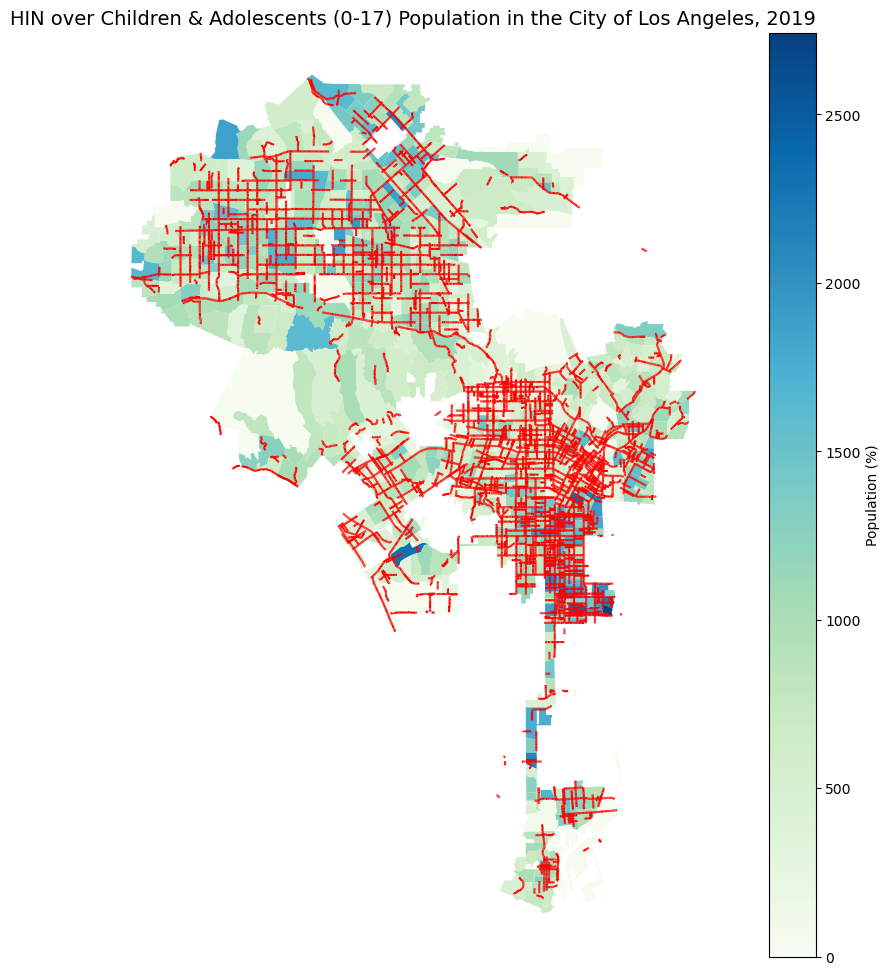

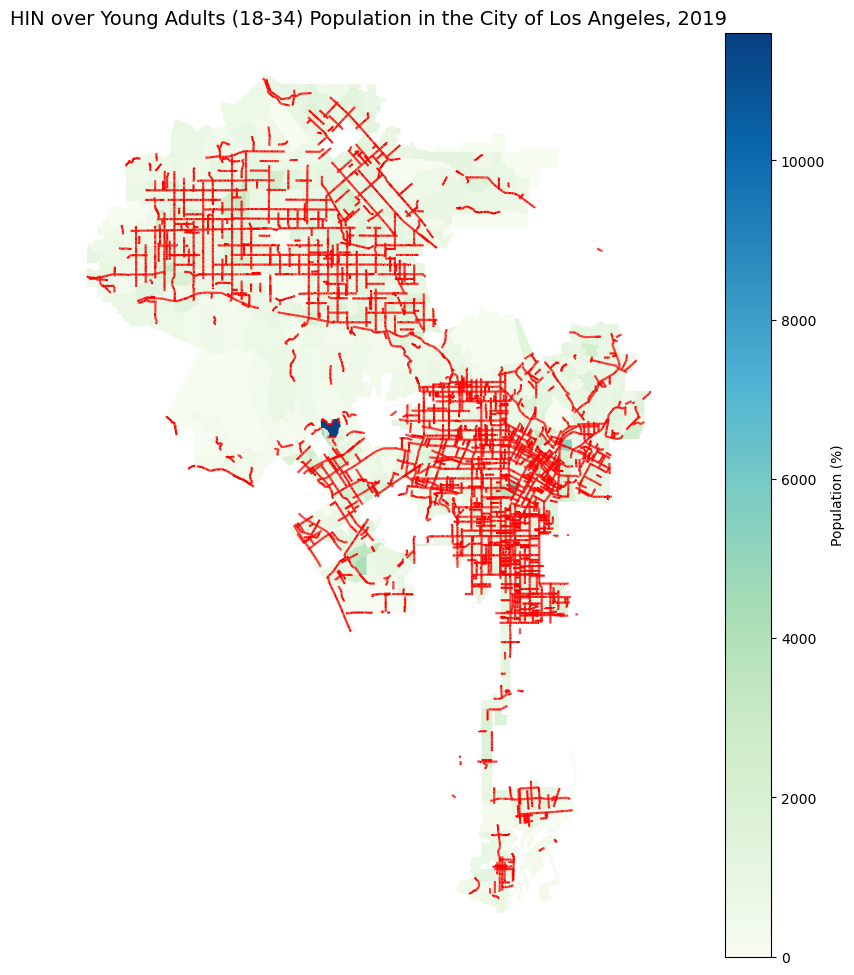

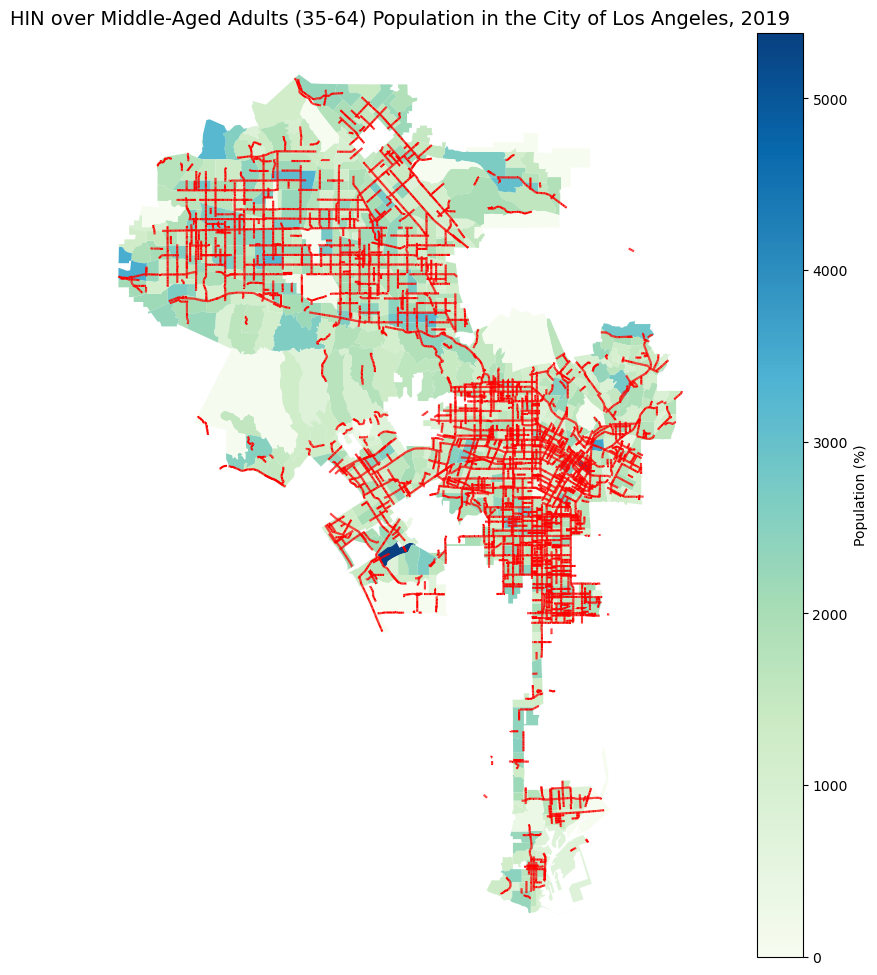

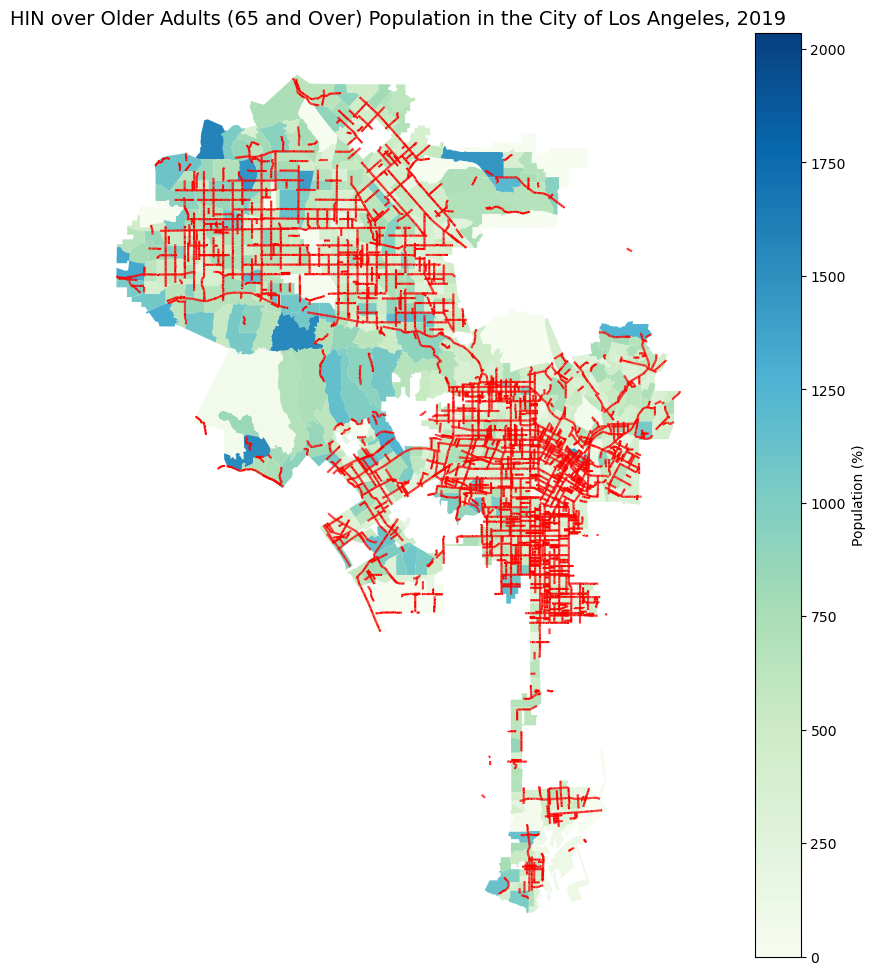

In [349]:
# Function to generate age distribution maps with HIN overlay
def plot_age_maps_with_HIN(data, columns, title_prefix, hin_data):  

    for column in columns:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        
        # Plot census tracts with the selected age group percentage
        la_age.plot(ax=ax, column=column, legend=True, cmap='GnBu',
                    legend_kwds={"label": "Population (%)", "orientation": "vertical"})
        
        # Overlay HIN data
        hin_data.plot(ax=ax, color='red', markersize=.001)
        
        ax.axis('off')
        ax.set_title(f"{title_prefix} {column} Population in the City of Los Angeles, 2019", fontsize=14)

# Loop!
plot_age_maps_with_HIN(la_age, age_map, "HIN over", HINla)
